# Step 1: Set Up Google Colab

In [27]:
!pip install pandas scikit-learn matplotlib seaborn

DEPRECATION: Loading egg at c:\users\altaf\appdata\local\programs\python\python311\lib\site-packages\ninja-1.11.1.3-py3.11-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


# Step 2: Upload & Load Dataset

In [19]:
import pandas as pd

# Use raw string (r"") to avoid escape character issues
file_path = r"C:\Users\altaf\Downloads\pulao_ingredients_500.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


         Date  Ingredient  Stock_Available (kg/L)  Reorder_Level (kg/L)  \
0  2024-01-01  Vegetables                   27.74                  3.45   
1  2024-01-02      Spices                   42.19                  6.66   
2  2024-01-03    Oil/Ghee                   19.40                  5.37   
3  2024-01-04      Spices                   45.30                  9.14   
4  2024-01-05      Spices                   22.51                  8.54   

   Purchase_Quantity (kg/L)  
0                     10.73  
1                     24.73  
2                     23.28  
3                     19.49  
4                     26.88  


# Step 3: Data Exploration & Preprocessing

In [20]:
# Show dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check basic statistics
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      500 non-null    object 
 1   Ingredient                500 non-null    object 
 2   Stock_Available (kg/L)    500 non-null    float64
 3   Reorder_Level (kg/L)      500 non-null    float64
 4   Purchase_Quantity (kg/L)  500 non-null    float64
dtypes: float64(3), object(2)
memory usage: 19.7+ KB
None
Date                        0
Ingredient                  0
Stock_Available (kg/L)      0
Reorder_Level (kg/L)        0
Purchase_Quantity (kg/L)    0
dtype: int64
       Stock_Available (kg/L)  Reorder_Level (kg/L)  Purchase_Quantity (kg/L)
count              500.000000            500.000000                500.000000
mean                27.022160              6.069660                 20.061240
std                 13.222507              2.353595     

# Step 4: Data Visualization

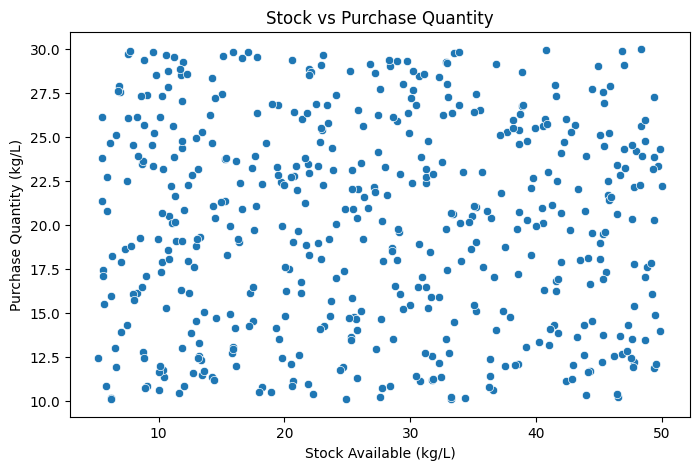

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Stock_Available (kg/L)"], y=df["Purchase_Quantity (kg/L)"])
plt.xlabel("Stock Available (kg/L)")
plt.ylabel("Purchase Quantity (kg/L)")
plt.title("Stock vs Purchase Quantity")
plt.show()


# Step 5: Prepare Data for ML Model

In [22]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical column 'Ingredient' to numerical
encoder = LabelEncoder()
df["Ingredient"] = encoder.fit_transform(df["Ingredient"])

# Display first few rows
print(df.head())



         Date  Ingredient  Stock_Available (kg/L)  Reorder_Level (kg/L)  \
0  2024-01-01           3                   27.74                  3.45   
1  2024-01-02           2                   42.19                  6.66   
2  2024-01-03           0                   19.40                  5.37   
3  2024-01-04           2                   45.30                  9.14   
4  2024-01-05           2                   22.51                  8.54   

   Purchase_Quantity (kg/L)  
0                     10.73  
1                     24.73  
2                     23.28  
3                     19.49  
4                     26.88  


# Step 6: Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['Stock_Available (kg/L)', 'Reorder_Level (kg/L)', 'Ingredient']]
y = df['Purchase_Quantity (kg/L)']

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset sizes
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 400, Testing samples: 100


# Step 7: Train ML Model

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Display first few predictions
print("Predicted Purchase Quantities (Random Forest):", y_pred_rf[:5])


Predicted Purchase Quantities (Random Forest): [21.5137 21.4012 22.2363 17.9483 18.7958]


# Step 8: Evaluate Model Performance

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate error metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)


Mean Absolute Error (MAE): 5.340280999999999
Mean Squared Error (MSE): 40.0061723627
R-squared (R2): -0.2595688892426513


# Step 9: Save the Model for Web Integration

In [28]:
import joblib
import os

# Define a valid local path for saving the model
save_path = r"C:\Users\altaf\Downloads\pulao_inventory_rf_model.pkl"  # Change if needed

# Save trained Random Forest model
joblib.dump(rf_model, save_path)

print(f"Random Forest Model saved successfully at: {save_path}")


Random Forest Model saved successfully at: C:\Users\altaf\Downloads\pulao_inventory_rf_model.pkl


In [30]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 3.1/124.9 MB 8.8 MB/s eta 0:00:14
   - -------------------------------------- 5.2/124.9 MB 8.8 MB/s eta 0:00:14
   -- ------------------------------------- 6.3/124.9 MB 8.2 MB/s eta 0:00:15
   -- ------------------------------------- 7.6/124.9 MB 7.8 MB/s eta 0:00:15
   -- ------------------------------------- 8.9/124.9 MB 7.5 MB/s eta 0:00:16
   --- ------------------------------------ 10.2/124.9 MB 7.2 MB/s eta 0:00:16
   --- ------------------------------------ 11.5/124.9 MB 7.1 MB/s eta 0:00:16
   ---- ----------------------------------- 12.8/124.9 MB 7.0 MB/s eta 0:00:17
   ---- ----------------------------------- 14.4/124.9 MB 6.9 MB/s eta 0:00:16
   ---- ----------------------------------- 15.2/124.9 MB 6.8 MB/s eta 0:00:17
   ----- ---------------------------------- 16.8/124.9 MB 6.8 MB/s

DEPRECATION: Loading egg at c:\users\altaf\appdata\local\programs\python\python311\lib\site-packages\ninja-1.11.1.3-py3.11-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [32]:
# Train XGBoost Model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("🔹 XGBoost Model Results:")
print(f"✅ Mean Absolute Error (MAE): {mae_xgb}")
print(f"✅ Mean Squared Error (MSE): {mse_xgb}")
print(f"✅ R-squared (R²): {r2_xgb}")


🔹 XGBoost Model Results:
✅ Mean Absolute Error (MAE): 5.359012549209594
✅ Mean Squared Error (MSE): 39.76016701085091
✅ R-squared (R²): -0.2518235672216622


In [33]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
print("✅ Best XGBoost Parameters:", grid_search.best_params_)


✅ Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [38]:
import joblib
import os

save_path = r"C:\Users\altaf\Downloads\pulao_inventory_xgb_model.pkl"
joblib.dump(best_xgb, save_path)

print(f"✅ XGBoost Model saved successfully at: {save_path}")


✅ XGBoost Model saved successfully at: C:\Users\altaf\Downloads\pulao_inventory_xgb_model.pkl


In [40]:
import os

model_path = r"C:\Users\altaf\Downloads\pulao_inventory_xgb_model.pkl"
print("File exists:", os.path.exists(model_path))


File exists: True


In [42]:
print(new_data.head())  
print("Columns in new_data:", new_data.columns)  


   Rice  Water  Salt  Spices
0     2      4     1     0.5
Columns in new_data: Index(['Rice', 'Water', 'Salt', 'Spices'], dtype='object')


In [44]:
# Load trained model
import joblib

model_path = r"C:\Users\altaf\Downloads\pulao_inventory_xgb_model.pkl"
model = joblib.load(model_path)

# Get expected features
expected_features = model.get_booster().feature_names  # For XGBoost models
print("Expected Features:", expected_features)


Expected Features: ['Stock_Available (kg/L)', 'Reorder_Level (kg/L)', 'Ingredient']


In [52]:
import pandas as pd
import joblib

# Load trained model
model_path = r"C:\Users\altaf\Downloads\pulao_inventory_xgb_model.pkl"
model = joblib.load(model_path)

# Ensure correct input values
new_data_values = [[2, 4, "Rice"]]  # Ensure Ingredient is categorical

# Create DataFrame with correct feature names
new_data = pd.DataFrame(new_data_values, columns=['Stock_Available (kg/L)', 'Reorder_Level (kg/L)', 'Ingredient'])

# Convert 'Ingredient' to categorical (Ensure same encoding as training)
new_data['Ingredient'] = new_data['Ingredient'].astype('category')

# Predict using the corrected input
new_pred = model.predict(new_data)


print(f"Predicted Value: {new_pred[0]:.5f}")




Predicted Value: 20.51516


In [6]:
import joblib

# Load the trained model
model = joblib.load(r"C:\Users\altaf\Downloads\pulao_inventory_xgb_model.pkl")

# Save it again
model_filename = "pulao_inventory_xgb_model.pkl"
joblib.dump(model, model_filename)

print(f"Model saved successfully as {model_filename}")


Model saved successfully as pulao_inventory_xgb_model.pkl


In [7]:
import joblib

# Load the trained model
model = joblib.load("pulao_inventory_xgb_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!
